In [ ]:
# application_record 고객 정보
# credit_record 신용카드 연체 데이터 
# ID 고객 (중복)
# MONTHS_BALANCE 0:현재, -1:1개월 전, -2:2개월 전 ... 
# STATUS 당시 연체 상태  숫자 : n개월 동안 연체(0 : 1~29일, 1: 30~59일 ... 5: 150일이상, 불량채무, 상각이상), C : 정상 상환, X : 해당 월 대출 없음

# CODE_GENDER 성별, FLAG_OWN_CAR 차량 소유 여부, FLAG_OWN_REALTY 부동산 소유 여부, CNT_CHILDREN 자녀 수, AMT_INCOME_TOTAL 연간 소득, NAME_INCOME_TYPE 직군, NAME_EDUCATION_TYPE 최종학력,
# NAME_FAMILY_STATUS 결혼여부, NAME_HOUSE_TYPE 자가여부, DAYS_BIRTH 탄생일수, DAYS_EMPLOYED 경력일(+는 실업자), FLAG_MOBIL 휴대전화 유뮤, FLAG_WORK_PHONE 직장전화, FLAG_PHONE 집전화, FLAG_EMAIL 이메일 적었는지
# OCCUPATION_TYPE 직업, CNT_FAM_MEMBERS 가족 구성원 수

# 신규고객을 받을지 말지 빚을 잘 갚는지 못 갚는지 확인해서 가입을 받는다. 
# 개개인의 신용을 평가

In [1]:
# 데이터 가져오기, app 고객 신청정보, credit 연체정보
# credit ID에대한 신용평가 

import numpy as np
import pandas as pd

app_df = pd.read_csv('archive/application_record.csv')
credit_df = pd.read_csv('archive/credit_record.csv')


# 데이터 불러오기

In [12]:
app_df 

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [13]:
credit_df

,ID,MONTHS_BALANCE,STATUS,YN
0,5001711,0,X,1
1,5001711,-1,0,1
2,5001711,-2,0,1
3,5001711,-3,0,1
4,5001712,0,C,1
...,...,...,...,...
1048570,5150487,-25,C,1
1048571,5150487,-26,C,1
1048572,5150487,-27,C,1
1048573,5150487,-28,C,1


In [2]:
yn_list = []
for i in range(0,len(credit_df)) :
    if credit_df['STATUS'][i] == '0' or credit_df['STATUS'][i] == '1' or credit_df['STATUS'][i] == 'C' or credit_df['STATUS'][i] == 'X' :
        yn_list.append('1')
    else :
        yn_list.append('0')

credit_df['YN'] = yn_list
# credit 연체 정보 status가 0, 1, C, X 면 Y 나머지 2, 3, 4, 5 면 N 기준으로 y 생성

In [3]:
merge_df = pd.merge(app_df, credit_df[['ID', 'YN']], how = 'inner')

merge_df

df = merge_df.drop_duplicates() # 중복 제거

df.reset_index(drop=True, inplace=True) # 인덱스 리셋

# 고객 정보와 신용 dataframe 합치기, 정제

In [4]:
merge_df['YN'].isna().sum()

0

In [5]:
# pandas로 데이터 전처리 category 열 변환

df_ = df.copy()

df_['CODE_GENDER'] = df_['CODE_GENDER'].map({'M' : 0, 'F' : 1})
df_['FLAG_OWN_CAR'] = df_['FLAG_OWN_CAR'].map({'N' : 0, 'Y' : 1})
df_['FLAG_OWN_REALTY'] = df_['FLAG_OWN_REALTY'].map({'N' : 0, 'Y' : 1})

# sklearn로 데이터 전처리 category 열 변환
# 자동으로 Label을 변환해준다.

from sklearn.preprocessing import LabelEncoder # encoding 사람이 볼 수 있는걸 컴퓨터가 이해하도록 변환하는 것

le = LabelEncoder()

df_['NAME_INCOME_TYPE'] = le.fit_transform(df_['NAME_INCOME_TYPE'].values) # fit 함수에 numpy 형태로 열을 넣어준다. 열의 종류를 확인 후 정보를 가진다. fit_transform하면 정보를 파악한 후 y를 반환한다.
df_['NAME_EDUCATION_TYPE'] = le.fit_transform(df_['NAME_EDUCATION_TYPE'].values)
df_['NAME_FAMILY_STATUS'] = le.fit_transform(df_['NAME_FAMILY_STATUS'].values)
df_['NAME_HOUSING_TYPE'] = le.fit_transform(df_['NAME_HOUSING_TYPE'].values)
df_['OCCUPATION_TYPE'] = le.fit_transform(df_['OCCUPATION_TYPE'].values)

df_

# labelencoder로 label data를 numeric data로 변환
ID_df = df_.iloc[:, 0] # 고객 ID
X_df = df_.iloc[:, 1:-1] # ID, YN을 제외한 데이터
y_df = df_.iloc[:, -1] # YN 정답 데이터

# df_로 카피, category data를 numeric data로 변환

In [6]:
from sklearn.model_selection import train_test_split

X = X_df.values # dataframe에서 마지막열(결과)를 제외하고 numpy array 형태로 가져온다.
y = y_df.values # 결과값을 numpy array 형태로 가져온다.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1) # 20%를 test data로 y를 참고해서 비율을 맞게 data를 random하게 나눈다.

# test로 값을 보고 하이퍼파라미터 튜닝을 반복하는 것은 test값이 간접적으로 머신의 학습에 관여를 한것이다. 실제로는 train을 한번 더 분할 해준다.
# validation set을 만들어서 검증하는데 사용한다.

# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, stratify = y, random_state = 1)

# 이후에 train으로 fit -> Scaler val과 test는 transform, model을 train으로 fit, val으로 모델선택, 하이퍼파라미터 튜닝을 반복하며 가장 좋은 모델을 찾는다.
# 마지막에 test로 최종 테스트, test는 하이퍼파라미터 튜닝에 쓰이면 안되고 마지막 모델 최종 평가에만 쓴다.

# 심화 k겹 교차검증 (k는 train 분할 개수)
# train과 validation을 8:2로 나눌 때 특정 모델에 유리하게 validation값이 정해질수도있다.
# 그래서 train을 5등분하고 1등분을 validation으로 4등분을 train으로 쓰는데 5조각을 validation으로 바꿔가면서 검증하고 평균을 내서 모델을 선택한다.

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)

# 데이터 스케일링

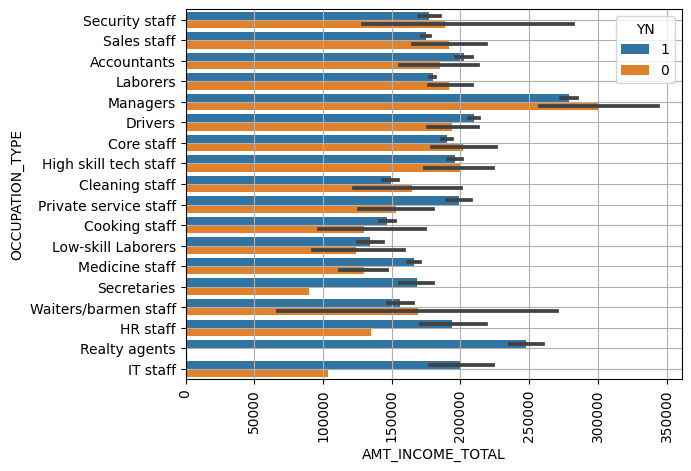

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()

plt.xticks(rotation = 90)

sns.barplot(x = 'AMT_INCOME_TOTAL', y = 'OCCUPATION_TYPE', hue = 'YN', data = df)

plt.grid()
plt.show()

# 가입 승인, 거부 별 직업과 수입의 상관관계

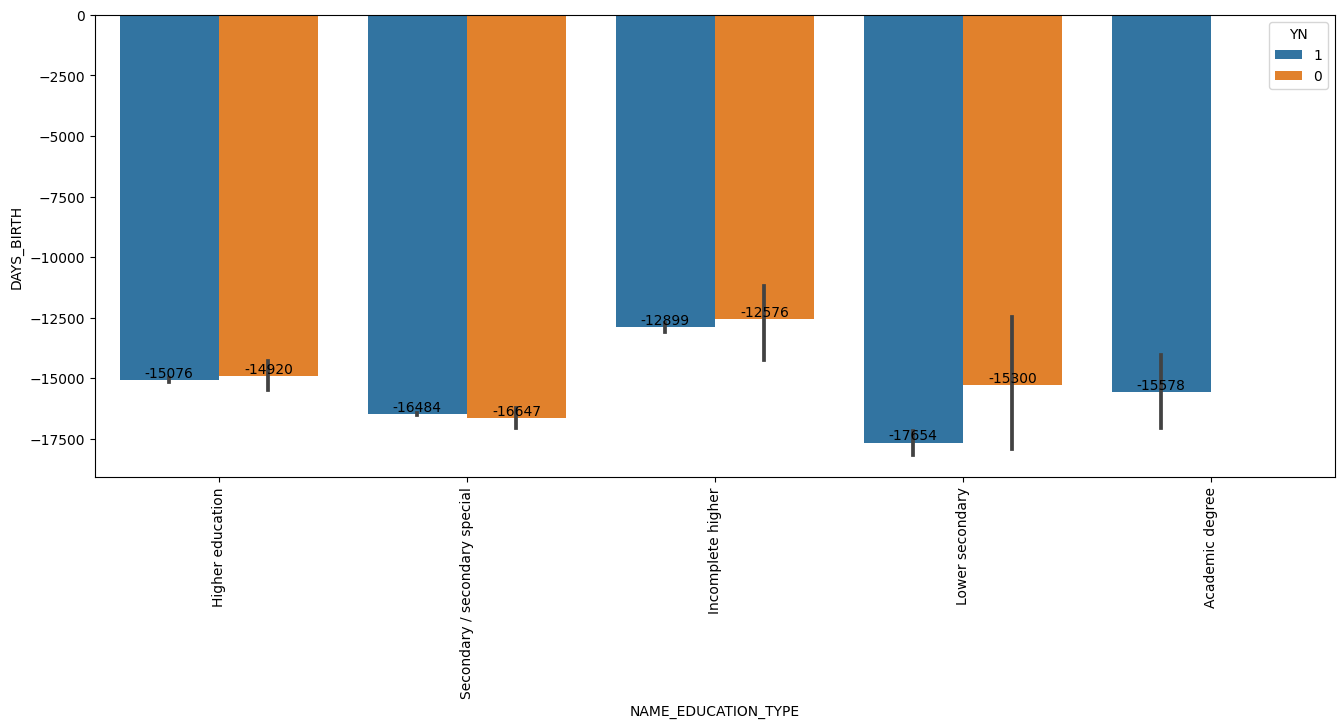

In [9]:
plt.figure(figsize = (16, 6))

ax = plt.gca()

plt.xticks(rotation = 90)

sns.barplot(x = 'NAME_EDUCATION_TYPE', y = 'DAYS_BIRTH', data = df, hue = 'YN')

# 막대 그래프위에 수치를 찍어준다.
for p in ax.patches : 
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'bottom' )

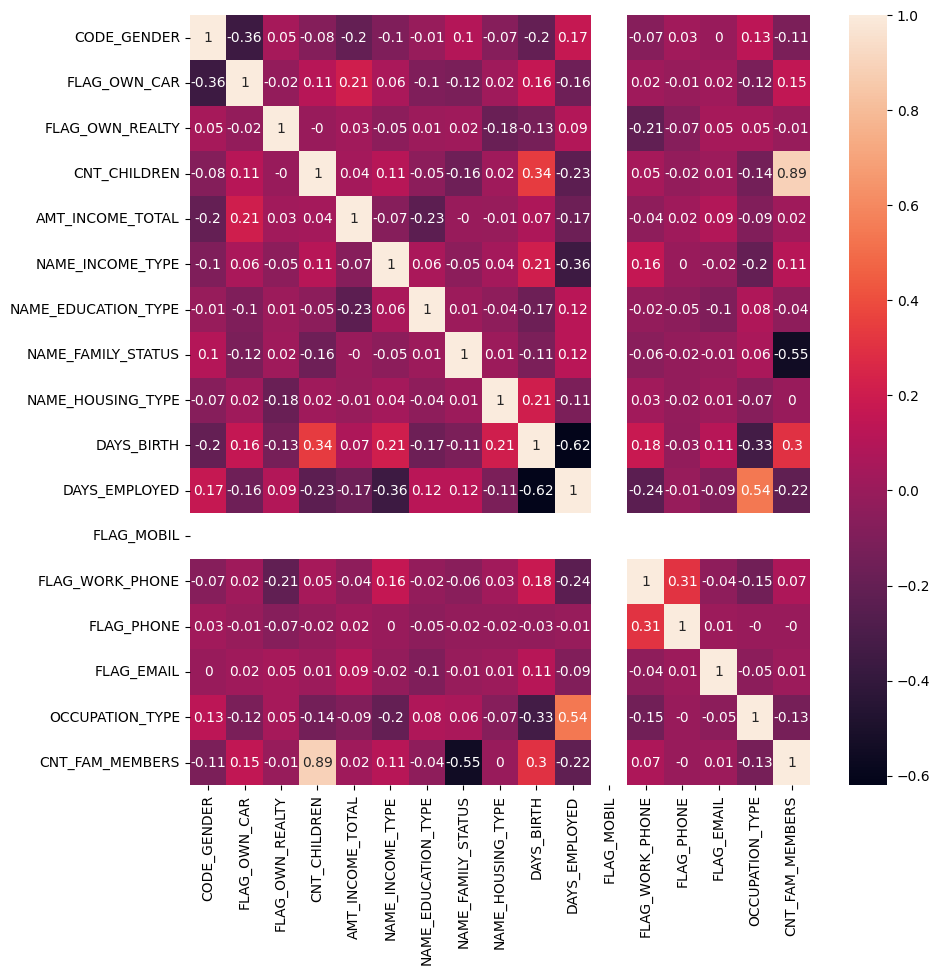

In [10]:
plt.figure(figsize = (10, 10))

corr = X_df.corr().round(2)

sns.heatmap(corr, annot = True)

plt.show()

# 특성 상관관계 

In [11]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(sampling_strategy = 'majority') # major 클래스를 minor 클래스와 맞춘다.
X_train_sp, y_train_sp = sampler.fit_resample(X_train, y_train)

print(np.unique(y_sp, return_counts = True))

plt.figure()
plt.scatter(X_sp[:, 0], X_sp[:, 1], c = y_sp, s = 3, alpha = 0.3)
plt.show()

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 4) #  criterion='gini' : 손실함수, max_depth : 최대 깊이 (복잡도 제한), max_features : 트리의 기준 특징, 차원 선택 (복잡도 제한), 
                                             # max_leaf_nodes : 단말 노드 수 (복잡도 제한), min_samples_leaf : (과소적합 방지), min_samples_split
    
tree.fit(X_train_sc, y_train)

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20, 10))
plot_tree(tree, feature_names = df_.iloc[:, 1:-1].columns, class_names = ['Y', 'N'])
plt.show()

# gini : 해당 노드의 손실함수 값, samples : fit할 때 사용된 sample 개수 

In [ ]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'gini', n_estimators = 25, random_state = 1, n_jobs = -1, max_depth = 4)
# 개개인의 모델은 성능이 좋지않다. 데이터를 일부러 과소적합시킨다. 
# 어떤 특성이 중요한지 판별할 수 있다.
# 최종단계으로 사용하기보다 특성선택을 위해 사용 할 수 있다.

forest.fit(X_train_sc, y_train)

In [ ]:
# 특성 중요도 feature_importances_
ipt = forest.feature_importances_

np.sort(ipt)

# zip(ipt, wine.feature_names)
# np.argsort(ipt) # 정렬된 순서대로 정렬전 index번호가 나온다.

for i in np.argsort(ipt) :
    print(X_df.columns[i])

idxs = np.argsort(ipt)[::-1] # 역순, 내림차순

plt.figure(figsize = (10, 2))

plt.bar(np.array(X_df.columns)[idxs], ipt[idxs])

plt.xticks(rotation = 90)

plt.show()

In [ ]:

X_train_sc[:, 0:]

In [ ]:
from sklearn.decomposition import KernelPCA

pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 15)

X_pca = pca.fit_transform(X_train_sc)

plt.figure(figsize = (10, 10))

plt.scatter(X_pca[y_train == 0, 0], X_pca[y_train == 0, 1], c = 'red') # shape이 같은 0으로 가득찬 배열 생성  = np.zeros(X_pca[y == 0, 0].shape)
plt.scatter(X_pca[y_train == 1, 0], X_pca[y_train == 1, 1], c = 'blue')

plt.show()

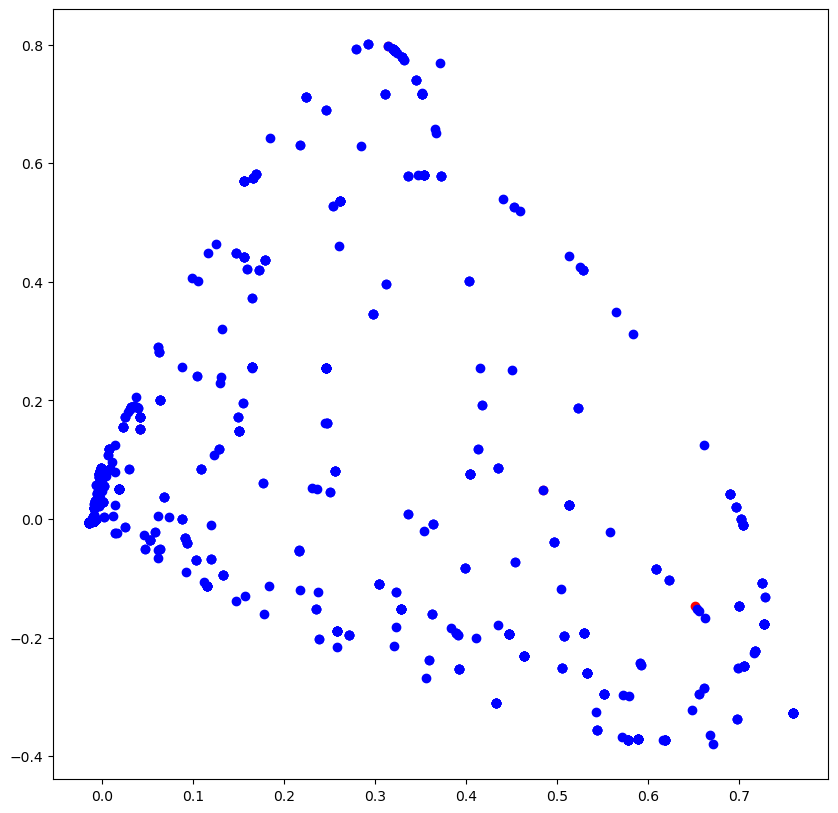

In [198]:
from sklearn.decomposition import KernelPCA

pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 15)

X_pca = pca.fit_transform(X_train_sc)

plt.figure(figsize = (10, 10))

plt.scatter(X_pca[y_train == 0, 0], X_pca[y_train == 0, 1], c = 'red') # shape이 같은 0으로 가득찬 배열 생성  = np.zeros(X_pca[y == 0, 0].shape)
plt.scatter(X_pca[y_train == 1, 0], X_pca[y_train == 1, 1], c = 'blue')

plt.show()

In [175]:
# 모든 파라미터에대해 다 해보기는 어렵다.
# 단순히 모든 경우에 수에대해 반복하며 최적의 값을 찾는 것을 Grid search 방식, 완전 램덤한 random search 방식 등등이 있다.

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

svc_pipe = make_pipeline(StandardScaler(), SVC(random_state = 1)) # SVC의 고정인자를 제외한 인자는 grid search할 때 넣어준다.
#lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(solver = 'liblinear', penalty = 'l2', random_state = 1))

C_range = np.logspace(-4, 3, 8)
gamma_range = np.logspace(-4, 3, 8)
kernel_list = ['linear', 'rbf'] #, 'poly', 'sigmoid', 'precomputed'] # kernel이 linear일 때는 gamma가 필요없다. 오류는 없지만 8번의 낭비한다. 
#penalty_list = ['l1', 'l2']
# 이럴때는 param_grid 딕셔너리를 분리해준다.

param_grid_svc = [{'svc__C' : C_range, 'svc__kernel' : ['linear']}, {'svc__C' : C_range, 'svc__gamma' : gamma_range, 'svc__kernel' : ['rbf']}] # SVC의 인자임을 알려주기위해 '소문자__인자' 로 명시
#param_grid_lr = [{'lr__C' : C_range}] #, 'lr__penalty' : penalty_list}] 

svc_gs = GridSearchCV(estimator = svc_pipe, param_grid = param_grid_svc, scoring = 'accuracy', cv = 10, n_jobs = -1)
#lr_gs = GridSearchCV(estimator = lr_pipe, param_grid = param_grid_lr, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [182]:
svc_gs = svc_gs.fit(X_pca, y_train_sp) # gs는 학습결과를 덮어써야한다.
#lr_gs = lr_gs.fit(X_train_sp, y_train_sp)

In [178]:
svc_gs.best_score_
svc_gs.best_estimator_
svc_gs.best_params_

"""lr_gs.best_score_
lr_gs.best_estimator_
lr_gs.best_params_"""

'lr_gs.best_score_\nlr_gs.best_estimator_\nlr_gs.best_params_'

In [183]:
svc_gs.best_params_

{'svc__C': 1000.0, 'svc__gamma': 1000.0, 'svc__kernel': 'rbf'}

In [184]:
svc_gs.best_score_

0.6602659245516388

In [185]:
svc_gs.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1000.0, gamma=1000.0, random_state=1))])

In [151]:
print(np.unique(y_train, return_counts = True))

(array(['N', 'Y'], dtype=object), array([  493, 29165], dtype=int64))


In [ ]:
lr_pipe = make_pipeline(StandardScaler(), PCA(n_components = 2), LogisticRegression(solver = 'liblinear', random_state = 1))